In [1]:
import json
import ast
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [2]:
bins = 1000
lat_min, lat_max = 41.04961, 41.24961
lon_min, lon_max = -8.71099, -8.51099

In [25]:
def get_coordinates(file_name):
    df = pd.read_csv(file_name)
    data = np.array(df)
    heatmap_plot = []
    for i in data:
        coordinates = i[1]
        for j in ast.literal_eval(coordinates):
            heatmap_plot.append(j)
    return pd.DataFrame(heatmap_plot, columns=['lng', 'lat'])

In [43]:
def plot_histogram(df, image_name):
    histogram2d_plot = df
    x = histogram2d_plot.lat
    y = histogram2d_plot.lng
    plt.hist2d(y, x, bins=15, cmap=plt.cm.jet, range=np.array([(lon_min, lon_max), (lat_min, lat_max)]))
    plt.colorbar()
    plt.savefig(image_name, figsize=(8, 6), dpi=1000)

In [35]:
def plot_travel_map(dataset_file, image_name):
    data = pd.read_csv(dataset_file,
                       chunksize=1000,      
                       usecols=['POLYLINE'],
                       converters={'POLYLINE': lambda x: json.loads(x)})
    z = np.zeros((bins, bins))
    for chunk in data:
        latlon = np.array([(lat, lon) 
                            for path in chunk.POLYLINE
                            for lon, lat in path if len(path) > 0])
        z += np.histogram2d(*latlon.T, bins=bins, 
                            range=[[lat_min, lat_max],
                                    [lon_min, lon_max]])[0]
    log_density = np.log(20 + z)
    plt.imshow(log_density[::-1,:], extent=[lat_min, lat_max, lon_min, lon_max])
    plt.savefig(image_name, figsize=(8, 6), dpi=1000)

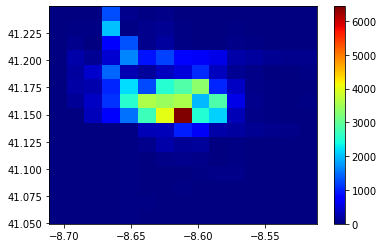

In [46]:
coordinates = get_coordinates('./data/synthetic_data_chances.csv')
plot_histogram(coordinates, './assets/[Synthetic] contact_tracing_heatmap.png')

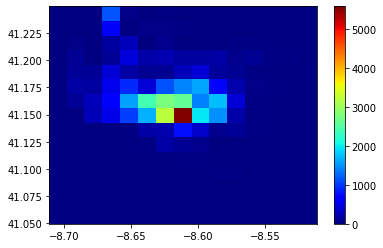

In [47]:
coordinates = get_coordinates('./data/chances.csv')
plot_histogram(coordinates, './assets/[Normal] contact_tracing_heatmap.png')

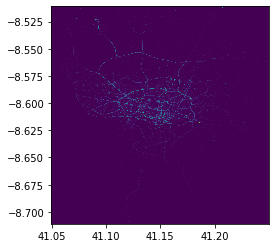

In [50]:
plot_travel_map('./data/synthetic_data.csv', './assets/[Synthetic] city_trajectory_map.png')

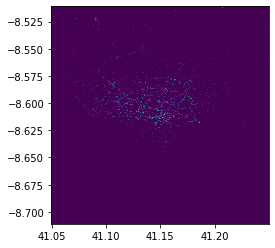

In [49]:
plot_travel_map('./data/test.csv', './assets/[Normal] city_trajectory_map.png')